### Importing tools and libraries

In [1]:
# Importing libraries
from collections import defaultdict
import pandas as pd
import numpy as np
import scipy
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import surprise as sp
import time

### Data Analysis

Reading and store the data from the csv files in dataframes

In [118]:
# Reading data
animeDF = pd.read_csv("data/anime_cleaned.csv")
userDF = pd.read_csv("data/users_cleaned.csv")
ratingDF = pd.read_csv("data/animelists_cleaned.csv")

Anime file

In [119]:
# Viewing anime dataframe
animeDF.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://cdn.myanimelist.net/images/anime/12/35...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://cdn.myanimelist.net/images/anime/13/58...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://cdn.myanimelist.net/images/anime/11/10...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://cdn.myanimelist.net/images/anime/13/32...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://cdn.myanimelist.net/images/anime/6/418...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


In [4]:
animeDF.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [5]:
animeDF.dtypes

anime_id             int64
title               object
title_english       object
title_japanese      object
title_synonyms      object
image_url           object
type                object
source              object
episodes             int64
status              object
airing                bool
aired_string        object
aired               object
duration            object
rating              object
score              float64
scored_by            int64
rank               float64
popularity           int64
members              int64
favorites            int64
background          object
premiered           object
broadcast           object
related             object
producer            object
licensor            object
studio              object
genre               object
opening_theme       object
ending_theme        object
duration_min       float64
aired_from_year    float64
dtype: object

User file

In [6]:
# Viewing users dataframe
userDF.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701
3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697
4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847


In [7]:
userDF.columns

Index(['username', 'user_id', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'location', 'birth_date', 'access_rank', 'join_date',
       'last_online', 'stats_mean_score', 'stats_rewatched', 'stats_episodes'],
      dtype='object')

In [8]:
userDF.dtypes

username                     object
user_id                       int64
user_watching                 int64
user_completed                int64
user_onhold                   int64
user_dropped                  int64
user_plantowatch              int64
user_days_spent_watching    float64
gender                       object
location                     object
birth_date                   object
access_rank                 float64
join_date                    object
last_online                  object
stats_mean_score            float64
stats_rewatched             float64
stats_episodes                int64
dtype: object

User Anime List file (score = ratings)

In [9]:
# Viewing users' ratings dataframe
ratingDF.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN


In [10]:
ratingDF.columns

Index(['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags'],
      dtype='object')

In [11]:
ratingDF.dtypes

username                object
anime_id                 int64
my_watched_episodes      int64
my_start_date           object
my_finish_date          object
my_score                 int64
my_status                int64
my_rewatching          float64
my_rewatching_ep         int64
my_last_updated         object
my_tags                 object
dtype: object

In [12]:
# Taking out only the columns I want from the rating dataframe
ratingDF = ratingDF[['username', 'anime_id', 'my_score', 'my_status']]
ratingDF['my_score'].describe().apply(lambda x: format(x, '.2f')).reset_index()

,index,my_score
0,count,31284030.00
1,mean,4.65
2,std,3.93
3,min,0.00
4,25%,0.00
5,50%,6.00
6,75%,8.00
7,max,10.00


In [13]:
# Finding the minimum rating and maximum rating within the dataframe
min_rating = ratingDF['my_score'].min()
max_rating = ratingDF ['my_score'].max()
print('Rating range: {0} to {1}'.format(min_rating, max_rating))

Rating range: 0 to 10


In [14]:
print(animeDF.shape, userDF.shape, ratingDF.shape, sep='\n')

(6668, 33)
(108711, 17)
(31284030, 4)


In [15]:
usersAndRatings = ratingDF['username'].value_counts().reset_index().rename(columns={"username": "animes_rated", "index": "username"})

In [16]:
usersSampled = userDF.sample(frac = .01, random_state = 2)
usersSampled.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
48731,Saperella,98375,21,162,0,4,28,34.550000,Male,"York, UK",1989-08-31 00:00:00,NaN,2008-09-25 00:00:00,2010-07-22 05:41:00,7.94,4.0,2131
35191,Inugirlz,207889,52,908,227,164,300,301.467361,Female,Where Maple Leaves Reside,1994-04-04 00:00:00,NaN,2009-07-14 00:00:00,2018-05-19 14:23:41,7.16,58.0,18796
77699,Luu-Senpai,5393511,10,663,0,0,19,177.401111,Male,Buenos Aires,1991-05-23 00:00:00,NaN,2016-05-07 00:00:00,2018-04-27 04:38:21,7.72,0.0,11129
95207,OzzyOtaku,607875,16,342,0,76,69,91.565278,Male,TEXAS,1989-01-24 00:00:00,NaN,2011-09-19 00:00:00,2018-05-20 18:51:57,7.77,18.0,5987
85049,Ahlala,485718,1,67,29,8,32,37.024306,Female,Philippines,1991-04-10 00:00:00,NaN,2011-05-12 00:00:00,2017-07-27 01:10:00,8.31,27.0,2251


In [17]:
userMergeRatings = pd.merge(usersAndRatings, usersSampled, left_on='username', right_on='username', how='inner')

In [18]:
# Group uses who rated same amount of anime
userRateAggregated = userMergeRatings['animes_rated'].value_counts().reset_index().rename(columns={"animes_rated": "group_size", "index": "animes_rated"}).sort_values(by=['animes_rated'])

In [19]:
# Count how may relevant scores each anime has
ratedPerAnime = ratingDF['anime_id'].value_counts().reset_index().rename(columns={"anime_id": "number_of_users", "index": "anime_id"})
ratedPerAnime.head()

,anime_id,number_of_users
0,1535,81332
1,1575,67721
2,226,64486
3,5114,63649
4,4224,63278


In [20]:
# Group users who rated the same amount of animes
animeRateAggregated = ratedPerAnime['number_of_users'].value_counts().reset_index().rename(columns={"number_of_users": "group_size", "index": "number_of_users"}).sort_values(by=['number_of_users'])
animeRateAggregated.head(n=30)

,number_of_users,group_size
331,1,3
27,2,11
25,3,11
23,4,12
6,5,16
18,6,13
14,7,14
7,8,16
0,9,22
2,10,21


### Data Analysis

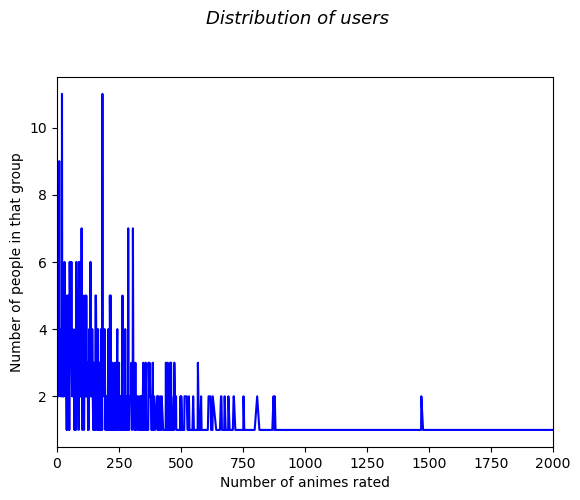

In [21]:
# Distributing of ratings in the sample
plt.suptitle("Distribution of users", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('animes_rated', 'group_size', data = userRateAggregated, color = 'blue')
plt.xlabel('Number of animes rated')
plt.ylabel('Number of people in that group')
plt.xlim(left = 0, right = 2000)
plt.show()

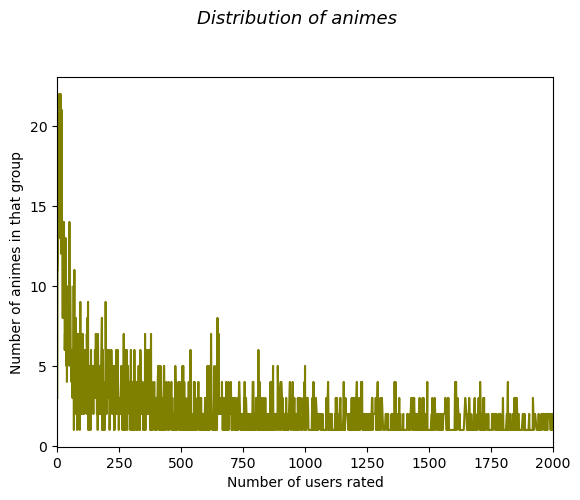

In [22]:
plt.suptitle("Distribution of animes", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('number_of_users', 'group_size', data = animeRateAggregated, color = 'olive')
plt.xlabel('Number of users rated')
plt.ylabel('Number of animes in that group')
plt.xlim(left = 0, right = 2000)
plt.show()

Creating a dataframe of users and anime with at least 10 ratings

In [23]:
userRateCut = userMergeRatings[userMergeRatings['animes_rated']>= 10]
animeRateCut = ratedPerAnime[ratedPerAnime['number_of_users']>=10]

# Creating a dataframe for popularity recommender (when user is new)
ratingDFNew = pd.merge(ratingDF, userRateCut, left_on = 'username', right_on = 'username', how = 'inner')
ratingDFNew = pd.merge(ratingDFNew, animeRateCut, left_on = 'anime_id', right_on = 'anime_id', how = 'inner')

See user rating count in a graph form

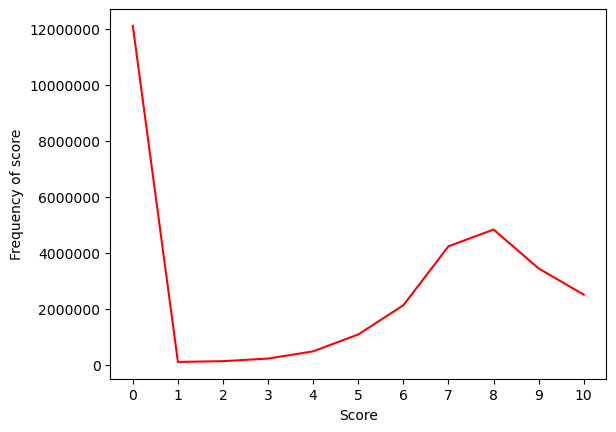

In [24]:
animeRates = ratingDF['my_score'].value_counts().reset_index().sort_values('index')
plt.plot('index', 'my_score', data = animeRates, color = 'red')
plt.xticks(np.arange(11))
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.xlabel('Score')
plt.ylabel('Frequency of score')
plt.show()

Metrics

In [25]:
def PrecisionRecall(predictions, k=10, threshold=7):
    # Map prediction to each user
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
        
    # Create dict with key - user | value - estimated ratings & actual ratings
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k /  n_rel if n_rel != 0 else 1

    return precisions, recalls


### Training and Testing

In [26]:
random_state = 42
reader = sp.Reader(rating_scale=(0, 10))
data = sp.Dataset.load_from_df(ratingDFNew[['username', 'anime_id', 'my_score']], reader)
trainset, testset = sp.model_selection.train_test_split(data, test_size=.25, random_state = random_state)
analysis = defaultdict(list)

test_dict = {'SVD' : sp.SVD(random_state=random_state), 'SlopeOne' : sp.SlopeOne(), 'NMF' : sp.NMF(random_state=random_state), 'NormalPredictor' : sp.NormalPredictor(), 'KNNBaseline' : sp.KNNBaseline(random_state=random_state), 'KNNBasic' : sp.KNNBasic(random_state=random_state), 'KNNWithMeans' : sp.KNNWithMeans(random_state=random_state), 'KNNWithZScore' : sp.KNNWithZScore(random_state=random_state), 'BaselineOnly' : sp.BaselineOnly(), 'CoClustering': sp.CoClustering(random_state=random_state)}

for key, value in test_dict.items():
    start = time.time()    
    value.fit(trainset)
    predictions = value.test(testset)

    rmse = sp.accuracy.rmse(predictions)
    precisions, recalls = PrecisionRecall(predictions, k=10, threshold=7)
    precision_avg = sum(prec for prec in precisions.values()) / len(precisions)

    analysis[value] = (key, rmse, precision_avg, time.time() - start)

print(analysis)

RMSE: 3.5223
RMSE: 3.2537
RMSE: 3.3655
RMSE: 5.1227
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.2144
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.3635
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.2437
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.2470
Estimating biases using als...
RMSE: 3.2434
RMSE: 3.2912
defaultdict(<class 'list'>, {<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000001DFDE954460>: ('SVD', 3.5222804706178525, 0.7650220755610538, 10.135819673538208), <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x000001DFDE954340>: ('SlopeOne', 3.2536559182968485, 0.8957212368425065, 44.176700830459595), <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x000001DFDE9762E0>: ('NMF', 3.3655207163253396, 0.7961386864659232, 21.06950068473816), <surprise.predicti

In [27]:
analysis_df = pd.DataFrame.from_dict(analysis, orient = 'index', columns = ['Algorithm', 'RMSE', 'Precision@10', 'Time to run (in seconds)']).reset_index()

#analysis_df['Algorithm'] = ['SVD', 'SlopeOne', 'NMF', 'NormalPredictor', 'KNNBaseline', 'KNNBasic', 'KNNWithMeans', 'KNNWithZScore', 'BaselineOnly', 'CoClustering']
analysis_df = analysis_df[['Algorithm', 'RMSE', 'Precision@10', 'Time to run (in seconds)']]
analysis_df = analysis_df.sort_values(by=['Precision@10'], ascending = False)
analysis_df['RMSE^-1'] = analysis_df['RMSE'] ** -1
analysis_df.head(n = 15)

,Algorithm,RMSE,Precision@10,Time to run (in seconds),RMSE^-1
8,BaselineOnly,3.243375,0.916755,1.119020,0.308321
1,SlopeOne,3.253656,0.895721,44.176701,0.307347
6,KNNWithMeans,3.243719,0.893348,18.275174,0.308288
4,KNNBaseline,3.214395,0.883658,51.330040,0.311101
9,CoClustering,3.291171,0.865126,11.423235,0.303843
7,KNNWithZScore,3.247020,0.845872,34.244132,0.307975
5,KNNBasic,3.363484,0.825126,27.156011,0.297311
2,NMF,3.365521,0.796139,21.069501,0.297131
0,SVD,3.522280,0.765022,10.135820,0.283907
3,NormalPredictor,5.122713,0.558086,1.309010,0.195209


Getting new training set

In [29]:
als_param_grid = {'bsl_options': {'method': ['als'],
                              'reg_i': [5, 10, 15],
                              'reg_u': [10, 15, 20],
                              'n_epochs': [5, 10, 15, 20]
                              }
              }

sgd_param_grid = {'bsl_options': {'method': ['sgd'],
                              'reg': [0.01, 0.02, 0.03],
                              'n_epochs': [5, 10, 15, 20],
                              'learning_rate' : [0.001, 0.005, 0.01]
                              }
              }

als_gs = sp.model_selection.GridSearchCV(sp.BaselineOnly, als_param_grid, measures=['rmse'], cv = 3, joblib_verbose = 0)

sgd_gs = sp.model_selection.GridSearchCV(sp.BaselineOnly, sgd_param_grid, measures=['rmse'], cv = 3, joblib_verbose = 0)

In [30]:
als_gs.fit(data)

# best RMSE score
print(als_gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(als_gs.best_params['rmse'])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

In [31]:
sgd_gs.fit(data)

# best RMSE score
print(sgd_gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(sgd_gs.best_params['rmse'])

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimati

Training Dataset

In [32]:
trainset = data.build_full_trainset()
algo = sp.BaselineOnly()
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
    
last_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
last_predictions.drop('rui', inplace = True, axis = 1)

Estimating biases using als...


Finding anime based on username

In [33]:
def bringing_first_n_values(df, uid, n=10):
    df = df[df['uid'] == uid].nlargest(n, 'est')[['uid', 'iid', 'est']]
    df = pd.merge(df, animeDF, left_on = 'iid', right_on = 'anime_id', how = 'left')
    return df[['uid', 'est', 'title', 'genre']]

In [41]:
bringing_first_n_values(last_predictions, 'Tomoki-sama')

,uid,est,title,genre
0,Tomoki-sama,8.050706,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance"
1,Tomoki-sama,7.910537,Mononoke Hime,"Action, Adventure, Fantasy"
2,Tomoki-sama,7.845694,Clannad: After Story,"Slice of Life, Comedy, Supernatural, Drama, Ro..."
3,Tomoki-sama,7.778978,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
4,Tomoki-sama,7.743585,Kimi no Na wa.,"Supernatural, Drama, Romance, School"
5,Tomoki-sama,7.696071,Shelter,"Sci-Fi, Music"
6,Tomoki-sama,7.593356,Final Fantasy VII: Advent Children,"Action, Super Power, Fantasy"
7,Tomoki-sama,7.593259,"Clannad: Mou Hitotsu no Sekai, Tomoyo-hen","Drama, Romance, School, Slice of Life"
8,Tomoki-sama,7.545917,One Piece 3D2Y: Ace no shi wo Koete! Luffy Nak...,"Adventure, Comedy, Fantasy, Shounen"
9,Tomoki-sama,7.541329,Tenkuu no Shiro Laputa,"Adventure, Fantasy, Romance, Sci-Fi"


Testing item based

In [35]:
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo_items = sp.KNNBaseline(sim_options=sim_options)
algo_items.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [125]:
def get_item_recommendations(anime_title, anime_id=100000, k=10):
    if anime_id == 100000:     
        anime_id = animeDF[animeDF['title'] == anime_title]['anime_id'].iloc[0]
        
    iid = algo_items.trainset.to_inner_iid(anime_id)
    neighbors = algo_items.get_neighbors(iid, k=k)
    raw_neighbors = (algo.trainset.to_raw_iid(inner_id) for inner_id in neighbors)
    df = pd.DataFrame(raw_neighbors, columns = ['Anime_ID'])
    df = pd.merge(df, animeDF, left_on = 'Anime_ID', right_on = 'anime_id', how = 'left')
    return df[['Anime_ID', 'image_url', 'title', 'genre', 'premiered']]

In [128]:
size = 10
recommendations = get_item_recommendations('Bungou Stray Dogs', k=size)
recommendations

,Anime_ID,image_url,title,genre,premiered
0,31964,https://cdn.myanimelist.net/images/anime/10/78...,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power",Spring 2016
1,31405,https://cdn.myanimelist.net/images/anime/9/775...,Joker Game,"Military, Historical, Drama",Spring 2016
2,24439,https://cdn.myanimelist.net/images/anime/12/73...,Kekkai Sensen,"Action, Comedy, Super Power, Supernatural, Vam...",Spring 2015
3,32867,https://cdn.myanimelist.net/images/anime/5/885...,Bungou Stray Dogs 2nd Season,"Action, Mystery, Supernatural, Seinen",Fall 2016
4,24833,https://cdn.myanimelist.net/images/anime/5/756...,Ansatsu Kyoushitsu,"Action, Comedy, School, Shounen",Winter 2015
5,28623,https://cdn.myanimelist.net/images/anime/12/79...,Koutetsujou no Kabaneri,"Action, Drama, Fantasy, Horror",Spring 2016
6,31798,https://cdn.myanimelist.net/images/anime/6/784...,Kiznaiver,"Sci-Fi, Drama, Romance",Spring 2016
7,32282,https://cdn.myanimelist.net/images/anime/8/793...,Shokugeki no Souma: Ni no Sara,"Ecchi, School, Shounen",Summer 2016
8,31580,https://cdn.myanimelist.net/images/anime/13/77...,Ajin,"Action, Mystery, Horror, Supernatural, Seinen",Winter 2016
9,30016,https://cdn.myanimelist.net/images/anime/2/813...,Nanbaka,"Action, Comedy, Drama",Fall 2016


### Store information

In [122]:
ids = np.where(animeDF['title'] == "Bungou Stray Dogs")[0][0]
animeDF.iloc[ids]['image_url']

'https://cdn.myanimelist.net/images/anime/3/79409.jpg'

In [97]:
for anime_id in animeDF['title']:
    print(anime_id)

Inu x Boku SS
Seto no Hanayome
Shugo Chara!! Doki
Princess Tutu
Bakuman. 3rd Season
Yume-iro Pâtissière
Ultra Maniac
Shakugan no Shana II (Second)
Nodame Cantabile: Paris-hen
Ouran Koukou Host Club
Junjou Romantica 2
Kaichou wa Maid-sama!
Sekaiichi Hatsukoi 2
Tonari no Kaibutsu-kun
Bleach
Chobits
Kimi ni Todoke
Naruto: Shippuuden
Ranma ½
Toradora!
Bakuman. 2nd Season
Gakuen Alice
Skip Beat!
Chihayafuru 2
Shounen Onmyouji
Chihayafuru
Itazura na Kiss
Beelzebub
Hanasakeru Seishounen
SKET Dance
B-gata H-kei
Crayon Shin-chan
Fruits Basket
Saiunkoku Monogatari
One Piece
Glass no Kamen (2005)
Air Gear
Saiunkoku Monogatari 2nd Season
InuYasha
Chu-Bra!!
Nodame Cantabile Finale
Ghost Hunt
Accel World
Bakuman.
Nodame Cantabile
Kamisama Hajimemashita
Cardcaptor Sakura
Daa! Daa! Daa!
Kimi ni Todoke 2nd Season
Sekaiichi Hatsukoi
Code-E
Junjou Romantica
Kiniro no Corda: Primo Passo
D.Gray-man Hallow
Super Danganronpa 2.5: Komaeda Nagito to Sekai no Hakaimono
Juuni Kokuki
Diabolik Lovers OVA
Neko Kono

In [107]:
# Extrating the title
anime_title = ([])
for title in animeDF['title']:
    anime_title.append(title)
anime_title

'Inu x Boku SS'

In [121]:
ids_index = []

for title in anime_title:
    ids = np.where(animeDF['title']==title)[0][0]
    ids_index.append(ids)
    
for ids in ids_index:
    url = animeDF.iloc[ids]['image_url']
    print(url)

https://cdn.myanimelist.net/images/anime/12/35893.jpg
https://cdn.myanimelist.net/images/anime/13/58383.jpg
https://cdn.myanimelist.net/images/anime/11/10645.jpg
https://cdn.myanimelist.net/images/anime/13/32209.jpg
https://cdn.myanimelist.net/images/anime/6/41845.jpg
https://cdn.myanimelist.net/images/anime/12/21674.jpg
https://cdn.myanimelist.net/images/anime/8/53571.jpg
https://cdn.myanimelist.net/images/anime/10/18669.jpg
https://cdn.myanimelist.net/images/anime/4/11918.jpg
https://cdn.myanimelist.net/images/anime/2/71992.jpg
https://cdn.myanimelist.net/images/anime/6/38417.jpg
https://cdn.myanimelist.net/images/anime/6/25254.jpg
https://cdn.myanimelist.net/images/anime/8/34871.jpg
https://cdn.myanimelist.net/images/anime/4/39779.jpg
https://cdn.myanimelist.net/images/anime/3/40451.jpg
https://cdn.myanimelist.net/images/anime/4/24648.jpg
https://cdn.myanimelist.net/images/anime/7/17890.jpg
https://cdn.myanimelist.net/images/anime/5/17407.jpg
https://cdn.myanimelist.net/images/anime

https://cdn.myanimelist.net/images/anime/13/62923.jpg
https://cdn.myanimelist.net/images/anime/6/72246.jpg
https://cdn.myanimelist.net/images/anime/12/30201.jpg
https://cdn.myanimelist.net/images/anime/7/22990.jpg
https://cdn.myanimelist.net/images/anime/11/75282.jpg
https://cdn.myanimelist.net/images/anime/13/56575.jpg
https://cdn.myanimelist.net/images/anime/10/66637.jpg
https://cdn.myanimelist.net/images/anime/1921/91076.jpg
https://cdn.myanimelist.net/images/anime/4/29406.jpg
https://cdn.myanimelist.net/images/anime/12/28390.jpg
https://cdn.myanimelist.net/images/anime/9/75568.jpg
https://cdn.myanimelist.net/images/anime/4/43233.jpg
https://cdn.myanimelist.net/images/anime/3/13200.jpg
https://cdn.myanimelist.net/images/anime/8/21336.jpg
https://cdn.myanimelist.net/images/anime/10/75195.jpg
https://cdn.myanimelist.net/images/anime/11/44522.jpg
https://cdn.myanimelist.net/images/anime/9/17338.jpg
https://cdn.myanimelist.net/images/anime/5/32591.jpg
https://cdn.myanimelist.net/images/

https://cdn.myanimelist.net/images/anime/8/30959.jpg
https://cdn.myanimelist.net/images/anime/2/87240.jpg
https://cdn.myanimelist.net/images/anime/11/82495.jpg
https://cdn.myanimelist.net/images/anime/8/33713.jpg
https://cdn.myanimelist.net/images/anime/2/47305.jpg
https://cdn.myanimelist.net/images/anime/11/20146.jpg
https://cdn.myanimelist.net/images/anime/4/60319.jpg
https://cdn.myanimelist.net/images/anime/1986/90184.jpg
https://cdn.myanimelist.net/images/anime/2/61349.jpg
https://cdn.myanimelist.net/images/anime/5/51281.jpg
https://cdn.myanimelist.net/images/anime/11/18779.jpg
https://cdn.myanimelist.net/images/anime/10/29219.jpg
https://cdn.myanimelist.net/images/anime/10/60089.jpg
https://cdn.myanimelist.net/images/anime/11/79379.jpg
https://cdn.myanimelist.net/images/anime/9/22178.jpg
https://cdn.myanimelist.net/images/anime/5/80117.jpg
https://cdn.myanimelist.net/images/anime/2/85592.jpg
https://cdn.myanimelist.net/images/anime/10/47533.jpg
https://cdn.myanimelist.net/images/a

In [123]:
# import data files into pkl files

import pickle
pickle.dump(algo, open('artifacts/algo.pkl', 'wb'))
pickle.dump(trainset, open('artifacts/trainset.pkl', 'wb'))
pickle.dump(testset, open('artifacts/testset.pkl', 'wb'))
pickle.dump(algo_items, open('artifacts/algo_items.pkl', 'wb'))
pickle.dump(animeDF, open('artifacts/anime_dataframe.pkl', 'wb'))
pickle.dump(anime_title, open('artifacts/anime_title.pkl', 'wb'))